In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2
import pickle

In [2]:
# Database connection parameters
db_params = {
    "host": "localhost",        # Replace with your PostgreSQL host
    "database": "bcb",      # Replace with your database name
    "user": "konstantinos",        # Replace with your username
    "password": "1234" # Replace with your password
}

# Establish a database connection
conn = psycopg2.connect(**db_params)

In [3]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

In [4]:
codegrid_non_gen_setting = {'f1':97.8, 'p':99.6, 'r':96.1, 'a':None}
codebert_non_gen_setting = {'f1':94.1, 'p':94.7, 'r':93.4, 'a':None}
astnn_non_gen_setting    = {'f1':93.8, 'p':99.8, 'r':88.4, 'a':None}

In [5]:
functionalities = pd.read_sql_query("SELECT * FROM functionalities", conn)

/var/folders/j9/k05ysrr550d9bhp1ns50p1hm0000gn/T/ipykernel_47781/1147858861.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  functionalities = pd.read_sql_query("SELECT * FROM functionalities", conn)


In [57]:
def draw_performance_line(d, metric, codegrid_non_gen_setting, model_name):
    
    fig, ax = plt.subplots(figsize=(13, 8))
    
    x = range(len(d))
    ax.plot(x, d[metric + '_b'], '-*', color=colors[1], label=model_name + ' + simple finetuning')
    ax.plot(x, d[metric+'_s']    , '-*', color=colors[2], label=model_name + ' + siamese finetuning')
    ax.plot([x[0], x[-1]], [codegrid_non_gen_setting, codegrid_non_gen_setting], '--', color='black', label='non-generalization setting') 

    ax.legend(loc='best')
    ax.set_xlabel('Functionality left out')
    ax.set_ylabel(metric + ' %')
    ax.set_title('one-vs-rest on BCB')
    ax.grid()
    ax.set_xticks(x, d['name'], rotation=90)

In [78]:
def draw_performance_scatter(d, metric, codegrid_non_gen_setting, model_name):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(d[metric + '_b'], d[metric+'_s'], '*', color=colors[1], markersize=15)
    ax.set_xlabel(model_name + ' + simple finetuning')
    ax.set_ylabel(model_name + ' + siamese finetuning')
    ax.set_title(metric)
    ax.grid()
    ax.set_xlim([60, 101])
    ax.set_ylim([60, 101])

In [93]:
functionalities

,name,description,id,search_heuristic
0,Download From Web,Downloads file from http link.,2,(openStream AND URL) OR (openConnection AND UR...
1,Secure Hash,1. Generate secure hash in binary format. 2. ...,3,.*\.\s*digest\s*\(.*
2,Copy File,Copies a file.,4,[getChannel] OR [transferFrom] OR [FileUtils.c...
3,Decompress zip archive.,"1. Retrieve a zip archive (from disk, internet...",5,Pattern#1: .*\.\s*getNext((Zip)|)Entry\s*\(\s*...
4,Connect to FTP Server,1 - Connect to the FTP server. 2 - Log in wit...,6,\.\s*connect\s*\( AND \.\s*login\s*\(
5,Bubble Sort Array,Sorts an array of values using bubble sort.,7,[a-z]\[[a-z]\] = [a-z]\[[a-z]+1\]
6,Execute update and rollback.,1 - Execute a database update. 2 - Rollback (...,10,executeUpdate\s*\( AND rollback\s*\(\s*\)
7,Initialize Java Eclipse Project.,1-Get eclipse project (create or receive). 2-...,11,setNatureIds AND setOutputLocation AND setRawC...
8,Get Prime Factors,Takes an integer and returns its prime factors.,12,"while (n % i == 0), allowing any identifier na..."
9,Shuffle Array in Place,"Shuffles an array (randomly) in-place. E.g., ...",13,j = i + random.nextInt(length-i) OR j = random...


### 1-vs-rest

In [8]:
fname_results_b = '/Users/konstantinos/Desktop/result-codebert-baseline-20231206-232751.pickle'
with open(fname_results_b, 'rb') as handle:
    result_b = pickle.load(handle)

# fname_results_siam = '/Users/konstantinos/Desktop/Clone Generalization/CodeGrid Cluster/result-codegrid-20231124-141927.pickle'
# with open(fname_results, 'rb') as handle:
#     result_siam = pickle.load(handle)

In [274]:
# ### ASTNN baseline vs siamese
# fcn_ids = [2  , 3  , 4  , 5   , 6  , 7  , 8  , 9  , 10 , 12  , 13 , 14   , 15 , 17  , 18  , 19 , 21 , 22  , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 32  , 33 , 34 , 35  , 36  , 37  , 39 , 40  , 41 , 43  , 44  , 45]

# f1_b    = [757, 684, 821, 667 , 911, 667, 968, 796, 667, 672 , 715 , 667 , 938, 791 , 751 , 899, 976, 673 , 667, 988, 994, 669, 740, 720, 983, 884, 750 , 697, 769, 935 , 1000, 701 , 932, 707 , 607, 689 , 998 , 643]
# p_b     = [852, 930, 823, 1000, 733, 989, 974, 873, 767, 850 , 680 , 799 , 867, 729 , 733 , 773, 825, 990 , 652, 929, 794, 579, 710, 606, 987, 865, 1000, 852, 625, 1000, 1000, 1000, 965, 959 , 574, 953 , 1000, 880]
# r_b     = [575, 540, 857, 800 , 991, 507, 905, 706, 508, 667 , 432 , 472 , 812, 718 , 895 , 501, 579, 546 , 833, 848, 785, 649, 771, 887, 980, 904, 600 , 590, 1000, 878, 1000, 540 , 901, 560 , 643, 540 , 995 , 507]
# a_b     = [611, 569, 843, 875 , 863, 514, 936, 755, 512, 713 , 392 , 492 , 833, 721 , 824 , 502, 613, 584 , 761, 881, 788, 633, 750, 764, 983, 887, 667 , 630, 812 , 930, 1000, 701 , 932, 707 , 607, 689 , 998 , 643]

# f1_s    = [764, 666, 851, 1000, 865, 667, 749, 889, 714, 815 , 798 , 714 , 718, 748 , 1000, 903, 684, 952 , 703, 902, 902, 702, 670, 708, 688, 638, 786 , 754, 664, 698 , 800 , 634 , 681, 667 , 637, 684 , 553 , 708]
# p_s     = [518, 579, 549, 478 , 570, 511, 961, 564, 500, 530 , 514 , 580 , 579, 523 , 531 , 545, 613, 505 , 485, 543, 582, 558, 544, 571, 527, 485, 647 , 619, 500, 587 , 667 , 484 , 550, 500 , 545, 526 , 445 , 548]
# r_s     = [957, 877, 912, 917 , 935, 956, 936, 964, 970, 1000, 771 , 926 , 733, 871 , 990 , 907, 950, 1000, 696, 905, 859, 937, 873, 933, 993, 934, 1000, 963, 986, 860 , 1000, 918 , 894, 1000, 766, 979 , 728 , 1000]
# a_s     = [533, 622, 582, 458 , 615, 521, 949, 609, 499, 556 , 521 , 627 , 600, 538 , 557 , 576, 675, 510 , 478, 571, 621, 597, 571, 615, 550, 471, 727 , 685, 500, 628 , 750 , 469 , 581, 500 , 564, 549 , 411 , 588]

test_size = [4000, 4000, 4000, 24, 4000, 4000, 156, 110, 3524, 160, 1170, 4000, 30, 420, 210, 582, 80, 202, 46, 84, 340, 504, 960, 208, 300, 1368, 66, 54, 144, 86, 12, 390, 284, 98, 94, 680, 426, 250]


### CodeGrid baseline vs siamese
# fname_results_s = '/Users/konstantinos/Desktop/Clone Generalization/CodeGrid Cluster/result-codegrid-siamese-20231130-200731.pickle'
# fname_results_s = '/Users/konstantinos/Desktop/Clone Generalization/CodeGrid Cluster/result-codegrid-siamese-20231208-202348.pickle'
# with open(fname_results_s, 'rb') as handle:
#     result_s = pickle.load(handle)

# f1_b     = [672, 701, 686, 629 , 708, 666, 948, 711, 660, 693 , 617 , 713, 647, 654, 691, 681, 745, 671 , 571, 679, 694, 699, 670, 708, 688, 638, 786 , 754, 664, 698 , 800 , 634 , 681, 667 , 637, 684 , 553 , 708]
# p_b      = [518, 579, 549, 478 , 570, 511, 961, 564, 500, 530 , 514 , 580, 579, 523, 531, 545, 613, 505 , 485, 543, 582, 558, 544, 571, 527, 485, 647 , 619, 500, 587 , 667 , 484 , 550, 500 , 545, 526 , 445 , 548]
# r_b      = [957, 877, 912, 917 , 935, 956, 936, 964, 970, 1000, 771 , 926, 733, 871, 990, 907, 950, 1000, 696, 905, 859, 937, 873, 933, 993, 934, 1000, 963, 986, 860 , 1000, 918 , 894, 1000, 766, 979 , 728 , 1000]
# a_b      = [533, 622, 582, 458 , 615, 521, 949, 609, 499, 556 , 521 , 627, 600, 538, 557, 576, 675, 510 , 478, 571, 621, 597, 571, 615, 550, 471, 727 , 685, 500, 628 , 750 , 469 , 581, 500 , 564, 549 , 411 , 588]



### CodeBERT baseline vs siamese
model_name = 'CodeBERT'
f1_s   = [687, 683, 839, 889 , 842, 670, 938, 780, 611, 747 , 528 , 593 , 839, 723, 806, 608, 680, 704 , 732, 886, 789, 612, 740, 720, 983, 884, 750 , 697, 769, 935 , 1000, 701 , 932, 707 , 607, 689 , 998 , 643]
p_s    = [852, 930, 823, 1000, 733, 989, 974, 873, 767, 850 , 680 , 799 , 867, 729, 733, 773, 825, 990 , 652, 929, 794, 579, 710, 606, 987, 865, 1000, 852, 625, 1000, 1000, 1000, 965, 959 , 574, 953 , 1000, 880]
r_s    = [575, 540, 857, 800 , 991, 507, 905, 706, 508, 667 , 432 , 472 , 812, 718, 895, 501, 579, 546 , 833, 848, 785, 649, 771, 887, 980, 904, 600 , 590, 1000, 878, 1000, 540 , 901, 560 , 643, 540 , 995 , 507]
a_s    = [611, 569, 843, 875 , 863, 514, 936, 755, 512, 713 , 392 , 492 , 833, 721, 824, 502, 613, 584 , 761, 881, 788, 633, 750, 764, 983, 887, 667 , 630, 812 , 930, 1000, 701 , 932, 707 , 607, 689 , 998 , 643]

fname_results_b = '/Users/konstantinos/Desktop/result-codebert-baseline-20231206-232751.pickle'
with open(fname_results_b, 'rb') as handle:
    result_b_init = pickle.load(handle)
fname_results_b = '/Users/konstantinos/Desktop/result-codebert-baseline-20231208-000533.pickle'
with open(fname_results_b, 'rb') as handle:
    result_b_rest = pickle.load(handle)

result_b = {}
for k in result_b_init.keys():
    result_b[k] = result_b_init[k] + result_b_rest[k]
    

In [286]:
result_b

{'fcn_id': [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  12,
  13,
  14,
  15,
  17,
  18,
  19,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  32,
  33,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 'f1': [0.9868354430379748,
  0.6519671422395157,
  0.9106753812636166,
  1.0,
  0.9050095811661648,
  0.9017023613399231,
  0.8727272727272727,
  0.7540983606557378,
  0.9934416880524664,
  0.980891719745223,
  0.9896373056994818,
  0.9804511278195488,
  1.0,
  0.8100558659217877,
  1.0,
  0.731578947368421,
  0.7037037037037037,
  0.7542372881355931,
  0.6333333333333333,
  0.7238095238095238,
  0.6649616368286445,
  0.8526785714285715,
  0.9297658862876255,
  0.7248908296943232,
  0.6711409395973155,
  0.6601275134870034,
  0.6666666666666666,
  1.0,
  0.7747747747747747,
  1.0,
  0.674373795761079,
  1.0,
  0.9893992932862191,
  0.6666666666666666,
  0.7068965517241379,
  0.7499999999999999,
  1.0,
  0.4144869215291751,
  0.6890756302521007],
 'p': 

In [275]:
fcn_ids_b = result_b['fcn_id']
f1_b = result_b['f1']
p_b  = result_b['p']
r_b  = result_b['r']
a_b  = result_b['a']
test_size_b = result_b['test_size']

# fcn_ids_s = result_s['fcn_id']
# f1_s = result_s['f1']
# p_s  = result_s['p']
# r_s  = result_s['r']
# a_s  = result_s['a']
# test_size_s = result_s['test_size']

# assert(test_size_siam == test_size_cg)
# assert(fcn_ids_siam == fcn_ids_cg)

# test_size = test_size_b
# fcn_ids = fcn_ids_b

test_size = test_size_s
fcn_ids = fcn_ids_s

In [276]:
N = min(len(f1_b), len(f1_s))

In [277]:
f1_b = f1_b[:N]
p_b  = p_b[:N]
r_b  = r_b[:N]
a_b  = r_b[:N]

f1_s = f1_s[:N]
p_s  = p_s[:N]
r_s  = r_s[:N]
a_s  = r_s[:N]

test_size = test_size[:N]
fcn_ids = fcn_ids[:N]

In [282]:
d = pd.DataFrame({'functionality_id': fcn_ids, 'f1_b': f1_b, 'f1_s':f1_s, 'p_b':p_b, 'p_s':p_s, 'r_b':r_b, 'r_s':r_s, 'a_b':a_b, 'a_s':a_s, 'test_size':test_size})


In [283]:
metrics = ['f1', 'p', 'r', 'a']
#models = ['b', 's']

models = ['b']
for metric in metrics:
    for model in models:
        k = metric+"_"+model
        #d[k] = d[k]/10
        d[k] = d[k]*100

models = ['s']
for metric in metrics:
    for model in models:
        k = metric+"_"+model
        #d[k] = d[k]*100
        d[k] = d[k]/10

In [284]:
d = pd.merge(d, functionalities, how="left", left_on="functionality_id", right_on="id")
d = d.drop({'description', 'id', 'search_heuristic'}, axis=1)

In [285]:
d

,functionality_id,f1_b,f1_s,p_b,p_s,r_b,r_s,a_b,a_s,test_size,name
0,2,98.683544,68.7,97.450000,85.2,99.948718,57.5,99.948718,57.5,4000,Download From Web
1,3,65.196714,68.3,75.400000,93.0,57.425743,54.0,57.425743,54.0,4000,Secure Hash
2,4,91.067538,83.9,83.600000,82.3,100.000000,85.7,100.000000,85.7,4000,Copy File
3,5,100.000000,88.9,100.000000,100.0,100.000000,80.0,100.000000,80.0,24,Decompress zip archive.
4,6,90.500958,84.2,82.650000,73.3,100.000000,99.1,100.000000,99.1,4000,Connect to FTP Server
5,7,90.170236,67.0,82.100000,98.9,100.000000,50.7,100.000000,50.7,4000,Bubble Sort Array
6,8,87.272727,93.8,92.307692,97.4,82.758621,90.5,82.758621,90.5,156,Setup SGV
7,9,75.409836,78.0,83.636364,87.3,68.656716,70.6,68.656716,70.6,110,Setup SGV Event Handler
8,10,99.344169,61.1,98.864926,76.7,99.828080,50.8,99.828080,50.8,3524,Execute update and rollback.
9,12,98.089172,74.7,96.250000,85.0,100.000000,66.7,100.000000,66.7,160,Get Prime Factors


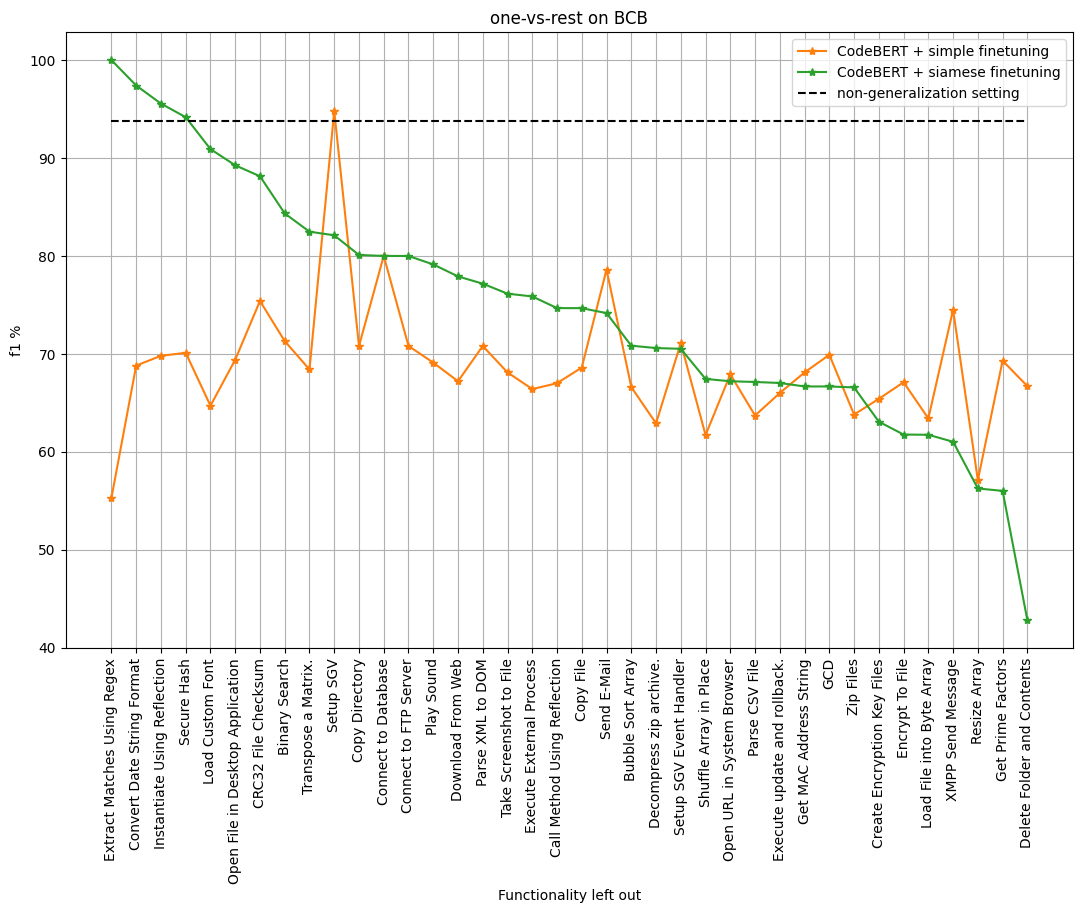

In [263]:
metric = 'f1'

d_sort = d.sort_values(metric+'_s', ascending=False)
# d_sort = d.sort_values('test_size', ascending=False)
draw_performance_line(d_sort, metric, astnn_non_gen_setting[metric], model_name)

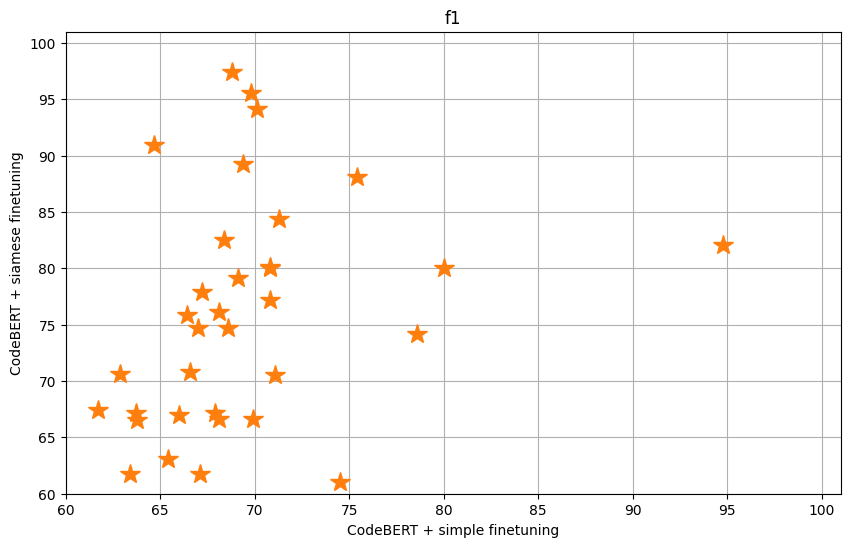

In [264]:
draw_performance_scatter(d, metric, astnn_non_gen_setting[metric], model_name)

In [265]:
mean_b = d[metric + '_b'].mean()
med_b  = d[metric + '_b'].median()
mean_s = d[metric + '_s'].mean()
med_s  = d[metric + '_s'].median()
print(mean_b)
print(med_b)
print(mean_s)
print(med_s)

print("Mean diff: %0.2f\nMedian diff: %0.2f" % (mean_s - mean_b, med_s - med_b))

68.7
68.25
74.66782009260496
74.66737181089405
Mean diff: 5.97
Median diff: 6.42


In [34]:
colors

['#1f77b4', '#ff7f0e', '#2ca02c']

In [236]:
def draw_barplot(f1, acc, p, r, model, colors, non_gen_setting, title=''):
        
    # Bar width
    bar_width = 0.9
    
    # Create positions for the bars
    if len(f1) == 2:
        models = [model+' + simple finetuning', model+' +siamese finetuning']
    elif len(f1) == 3:
        models = [model+' simple funetuning from paper', model+' + simple finetuning', model+' +siamese finetuning']


    n_models = len(models)
    bar_positions_f1  = np.arange(n_models)
    bar_positions_p   = bar_positions_f1 + n_models + 1
    bar_positions_r   = bar_positions_p + n_models + 1
    bar_positions_acc = bar_positions_r + n_models + 1

    
    # Increase figure height
    fig, ax = plt.subplots(figsize=(13, 8))
    
    # Create a bar plot for F1 scores
    ax.bar(bar_positions_f1, f1, width=bar_width, color=colors, label='F1 Score')

    ax.bar(bar_positions_p, p, width=bar_width, color=colors, label='F1 Score')
    ax.bar(bar_positions_r, r, width=bar_width, color=colors, label='F1 Score')

    
    # Create a bar plot for accuracy scores
    ax.bar(bar_positions_acc, acc, width=bar_width, color=colors, label='Accuracy')



    ax.plot([bar_positions_f1[0], bar_positions_f1[-1]], [non_gen_setting['f1'], non_gen_setting['f1']], 'black', linestyle='--')
    ax.plot([bar_positions_p[0], bar_positions_p[-1]], [non_gen_setting['p'], non_gen_setting['p']], 'black', linestyle='--')
    ax.plot([bar_positions_r[0], bar_positions_r[-1]], [non_gen_setting['r'], non_gen_setting['r']], 'black', linestyle='--')
    ax.plot([bar_positions_acc[0], bar_positions_acc[-1]], [non_gen_setting['a'], non_gen_setting['a']], 'black', linestyle='--')

        
    # Set axis labels and title
    ax.set_ylabel('%')

    ax.set_title(title)
    
    # Set x-axis ticks and labels
    ax.set_xticks([(bar_positions_f1[-1] + bar_positions_f1[0])/ 2,  (bar_positions_p[-1] + bar_positions_p[0]) / 2,  (bar_positions_r[-1] + bar_positions_r[0]) / 2, (bar_positions_acc[-1] + bar_positions_acc[0]) / 2])
    ax.set_xticklabels(['F1', 'Precision', 'Recall',  'Acc'])
    
    
    # Create a custom legend with model names and colors
    legend_elements = [plt.Line2D([0], [0], color=color, label=model) for model, color in zip(models, colors)]
    legend_elements.append(plt.Line2D([0], [0], color='black', label='Non-generalization setting', linestyle='--'))


    ax.legend(handles=legend_elements, loc='upper right')
    
    # Show the plot
    plt.show()

### BCB --> SCB

In [290]:
### CodeBERT
model = 'CodeBERT'
non_gen = codebert_non_gen_setting
## From paper
# f1  = [61, 66.5]
# acc = [54, 52.4]
# p   = [53, 94.6]
# r   = [73, 51.3]

# ## From replication
# f1  = [65.7, 66.5]
# acc = [49.8, 52.4]
# p   = [96.1, 94.6]
# r   = [49.9, 51.3]

# ## From both
# f1  = [61, 65.7, 66.5]
# acc = [54, 49.8, 52.4]
# p   = [53, 96.1, 94.6]
# r   = [73, 49.9, 51.3]



# ### ASTNN
# model = 'ASTNN'
# non_gen = astnn_non_gen_setting
# f1  = [71.1, 84.1]
# acc = [61.5, 83.8]
# p   = [56.9, 82.5]
# r   = [94.8, 85.8]


### CodeGrid
model = 'CodeGrid'
non_gen = codegrid_non_gen_setting
f1  = [61.4, 66.6]
acc = [49.4, 50]
p   = [49.6, 50]
r   = [80.4, 99.5]

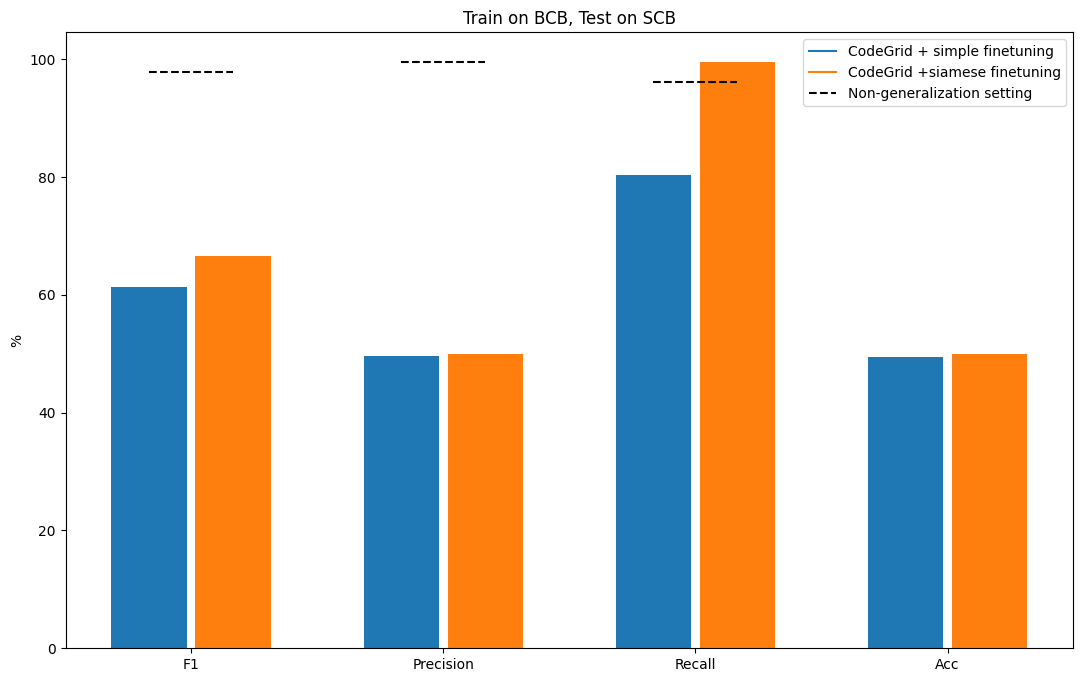

In [291]:
draw_barplot(f1, acc, p, r, model, colors, non_gen, title='Train on BCB, Test on SCB')

$F_1 = 2*\frac{P  R}{P+R}$

### SCB --> BCB

In [287]:
# ### CodeBERT
# model = 'CodeBERT'
# non_gen = codebert_non_gen_setting
# f1  = [62.9, 67.9]
# acc = [51.7, 53.9]
# p   = [82.0, 97.6]
# r   = [51.1, 52.1]

# ### ASTNN
# model = 'ASTNN'
# non_gen = astnn_non_gen_setting
# f1  = [42.4, 68.2]
# acc = [52.1, 58.3]
# p   = [53.2, 55.1]
# r   = [35.3, 89.6]

# ### CodeGrid
# model = 'CodeGrid'
# non_gen = codegrid_non_gen_setting
# f1  = [53.1, 65.3]
# acc = [49.3, 59.5]
# p   = [49.4, 57.1]
# r   = [57.3, 76.2]

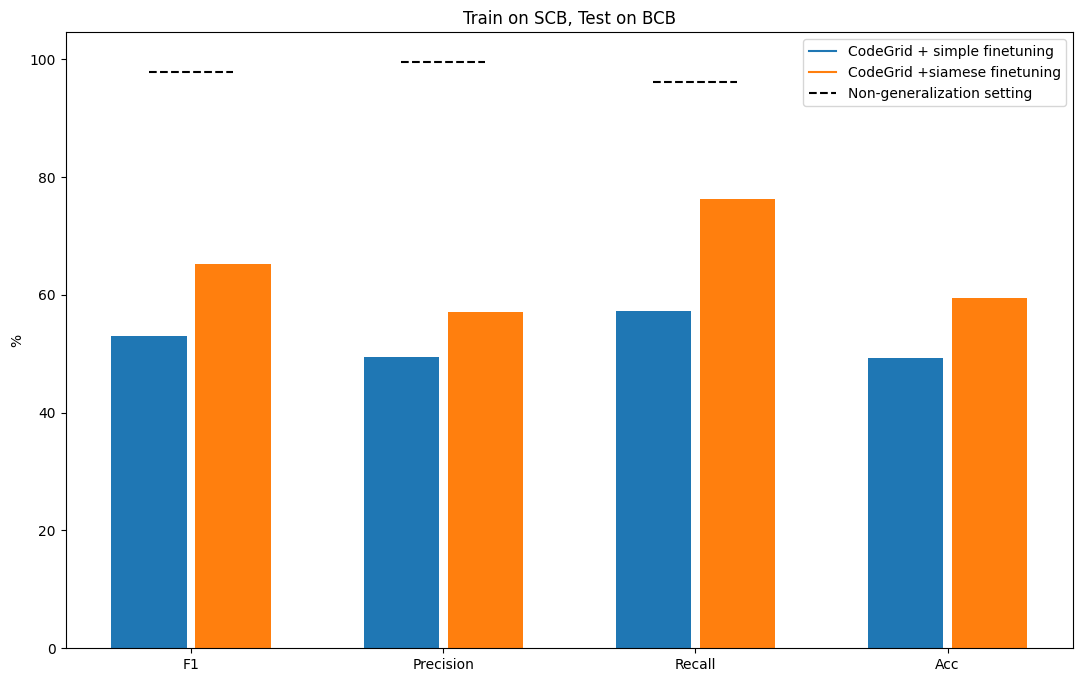

In [288]:
draw_barplot(f1, acc, p, r, model, colors, non_gen, title='Train on SCB, Test on BCB')

### 